# Materi

#### 1. Membangun rangkaian hanya menggunakan Quantum Register 
    - Saat membangun rangkaian, kita wajib menyertakan Quantum Register.
    - Classical Register boleh tidak digunakan
    - Pengukuran kuantum Qubit Penuh
    - Mendapatkan nilai bit klasik dari hasil pengukuran

#### 2. Membangun rangkaian dengan Quantum Register dan Classical Register
    - Classical Register dipakai untuk menampung nilai bit klasik dari hasil pengukuran 
    - Jika menggunakan Classical Register, kita bisa mendapatkan nilai bit klasik
    - Mendapatkan nilai bit klasik dari hasil pengukuran

#### 3. Pengukuran kuantum Qubit Parsial
    - Hanya mengukur sebagian dari qubit dalam sistem
    - Hasil pengukuran dapat mempengaruhi keadaan sisa sistem yang tidak diukur.
    - Menampilkan keadaan sistem kuantum setelah pengukuran

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sqrt
import math

### 1. Membangun Rangkaian hanya menggunakan Quantum Register

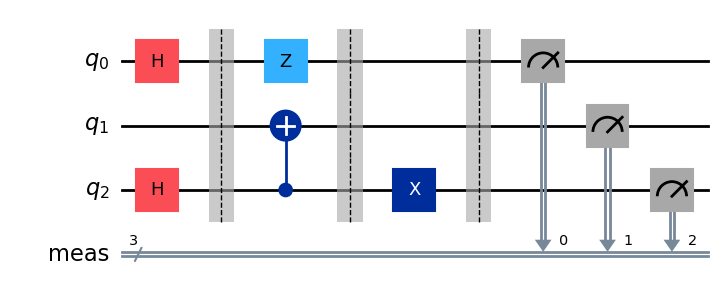

In [5]:
qc=QuantumCircuit(3)    # sediakan 3 register qubit (tanpa register klasik)
qc.h([0,2])             # terapkan gerbang Hadamard pada q0 dan q2
qc.barrier()            # pembatas
qc.cx(2,1)              # Gerbang Kontrol NOT, q2 sebagai kontrol, q1 sebagai target
qc.z(0)                 # terapkan gerbang Z pada q0
qc.barrier()            # pembatas
qc.x(2)                 # terapkan gerbang Not pada q2

# Pengukuran kuantum Qubit Penuh
qc. measure_all()       # Pengukuran pada seluruh qubit, hasilnya disimpan di meas
qc.draw('mpl')          # Gambar rangkaian di layar

{'010': 225, '100': 236, '101': 256, '011': 283}


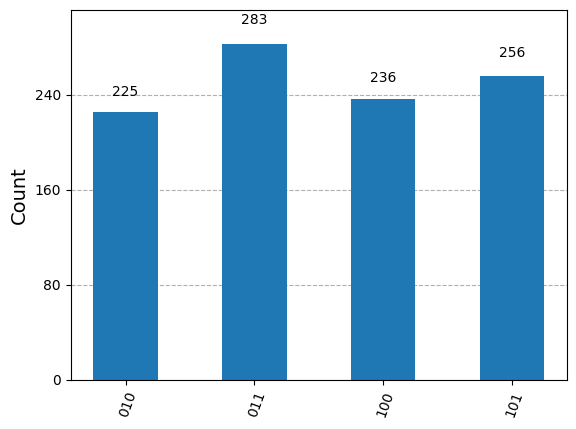

In [8]:
# Simulasikan di komputer lokal
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1000)
result = job.result()
##########################################
count = result.get_counts()
print(count)
# Visualisasi Hasil Pengukuran
plot_histogram(count)

In [10]:
print('keadaan 001: ',count['010'],' kali')
print('keadaan 011: ',count['011'],' kali')
print('keadaan 100: ',count['100'],' kali')
print('keadaan 101: ',count['101'],' kali')

keadaan 001:  225  kali
keadaan 011:  283  kali
keadaan 100:  236  kali
keadaan 101:  256  kali


### 2. Membangun rangkaian dengan Quantum Register dan Classical Register


In [ ]:
qc=QuantumCircuit(3,3)  # sediakan 3 register qubit dan 3 register classical bit
qc.h([0,2])             # terapkan gerbang Hadamard pada q0 dan q2
qc.barrier()            # pembatas
qc.cx(2,1)              # Gerbang Kontrol NOT, q2 sebagai kontrol, q1 sebagai target
qc.z(0)                 # terapkan gerbang Z pada q0
qc.barrier()            # pembatas
qc.x(2)                 # terapkan gerbang Not pada q2

# Pengukuran kuantum Qubit Penuh
qc.measure([0,1,2], [0,1,2])   # hasil pengukuran q0 disimpan di c0, q1 di c1 dan q2 di c2
qc.draw('mpl')                 # Gambar rangkaian di layar

In [ ]:
# Simulasikan di komputer lokal
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1000)
result = job.result()
#########################################
count = result.get_counts()
print(count)
# Visualisasi Hasil Pengukuran
plot_histogram(count)

### Mendapatkan nilai bit klasik dari hasil pengukuran

In [ ]:
data_state = list(count.keys())
print(data_state)

In [ ]:
for i in range(4):
    print('state ke: ', i, '  adalah: ', data_state[i])

In [ ]:
print('Rincian state ke-2')
print('==================')
#state = list(count.keys())[2]
state = data_state[2]
print('state: c2_c1_c0 = ', state)
print('nilai bit c2 = ', state[0])
print('nilai bit c1 = ', state[1])
print('nilai bit c0 = ', state[2])


In [ ]:
for state, jumlah in count.items():
    print(f"State: {state}, Jumlah: {jumlah}")
    count[state]= count[state]/1000

print()
for state, jumlah in count.items():
    print(f"State: {state}, Probabilitas: {jumlah}")

### 3. Pengukuran Parsial

In [ ]:
qc = QuantumCircuit(3,3)
qc.h([0,1,2])             # terapkan gerbang Hadamard pada q0 dan q2
qc.barrier()            # pembatas
qc.cx(2,1)              # Gerbang Kontrol NOT, q2 sebagai kontrol, q1 sebagai target
qc.z(0)                 # terapkan gerbang Z pada q0
qc.barrier()            # pembatas
qc.x(2)                 # terapkan gerbang Not pada q2
qc.draw('mpl')

In [ ]:
# keadaan kuantum saat ini
psi=Statevector(qc)
psi.draw('latex')

#### Sebelum dilakukan pengukuran
     - Terdapat 8 keadaan kuantum

##### Pasangan q1q0 = 00, 01, 10, 11
     - 00 terjadi pada 000 dan 100
     - 01 terjadi pada 001 dan 101
     - 10 terjadi pada 010 dan 110
     - 11 terjadi pada 011 dan 111

#### Pengukuran hanya dilakukan pada q0 dan q1

In [ ]:
qc.measure([0,1], [0,1])   # hasil pengukuran q0 disimpan di c0, dan q1 di c1 
qc.draw('mpl')

In [ ]:
# Simulasikan di komputer lokal
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1000)
result = job.result()
#########################################
count = result.get_counts()
print(count)
# Visualisasi Hasil Pengukuran
plot_histogram(count)

#### setelah q1 dan q0 diukur, keadaan kuantumnya runtuh menjadi bit klasik. 
- Ada 4 kemungkinan yang bisa terjadi.
- 1. jika hasil pengukuran q1q0 = 00, maka keadaan kuantum sistem berubah menjadi Psi = 000 dan 100
- 2. jika hasil pengukuran q1q0 = 01, maka keadaan kuantum sistem berubah menjadi Psi = 001 dan 101
- 3. jika hasil pengukuran q1q0 = 10, maka keadaan kuantum sistem berubah menjadi Psi = 010 dan 110
- 4. jika hasil pengukuran q1q0 = 11, maka keadaan kuantum sistem berubah menjadi Psi = 011 dan 111

#### Menampilkan keadaan sistem kuantum setelah pengukuran

In [ ]:
sim = AerSimulator()
qc.save_statevector()
psi_2 = sim.run(qc).result().get_statevector()
##################################################
psi_2.draw('latex')

- Perhatikan bahwa q2 masih dalam keadaan superposisi: 